In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from matplotlib.ticker import MaxNLocator, MultipleLocator
import matplotlib.ticker as mticker
from matplotlib.gridspec import GridSpec
import numpy as np
import itertools

from matplotlib.lines import Line2D
import matplotlib.patches as patches

import math

In [2]:
# df_SPS1_Budg1150 = pd.read_parquet('50it_SSP2-PkBudg1150-SPS1.gzip')
# df_SPS1_Budg1150_onlyshares = pd.read_parquet('400 iterations - Only shares/results_20240812_194236.gzip')

In [3]:
df_SPS1_Budg1150_1 =  pd.read_parquet('2000 iterations/results_20241019_030234.gzip')
df_SPS1_Budg1150_2 =  pd.read_parquet('2000 iterations/results_20241019_062717.gzip')
df_SPS1_Budg1150_3 =  pd.read_parquet('2000 iterations/results_20241019_095026.gzip')
df_SPS1_Budg1150_4 =  pd.read_parquet('2000 iterations/results_20241019_131038.gzip')

df_SPS1_Budg1150 = pd.concat([df_SPS1_Budg1150_1, df_SPS1_Budg1150_2, df_SPS1_Budg1150_3, df_SPS1_Budg1150_4], ignore_index=True)

In [4]:
df_SPS1_Budg1150_1_onlyshares =  pd.read_parquet('2000 iterations/only_shares/results_20241020_131012.gzip')
df_SPS1_Budg1150_2_onlyshares =  pd.read_parquet('2000 iterations/only_shares/results_20241020_163925.gzip')
df_SPS1_Budg1150_3_onlyshares =  pd.read_parquet('2000 iterations/only_shares/results_20241020_200513.gzip')
df_SPS1_Budg1150_4_onlyshares =  pd.read_parquet('2000 iterations/only_shares/results_20241020_232552.gzip')

df_SPS1_Budg1150_onlyshares = pd.concat([df_SPS1_Budg1150_1_onlyshares, df_SPS1_Budg1150_2_onlyshares, df_SPS1_Budg1150_3_onlyshares, df_SPS1_Budg1150_4_onlyshares], ignore_index=True)

In [5]:
df_SPS1_Budg1150.head()

,act_category,variable,year,region,location,model,scenario,impact_category,quantile,value
0,Repair of electrical equipment,FE_residential_space_heating_coal,2040,CH,CH,remind,SSP2-PkBudg1150-SPS1,"ReCiPe 2016 v1.03, midpoint (H) - water use - ...",0.05,-3.232521e-28
1,Repair of electrical equipment,FE_residential_space_heating_coal,2040,CH,CH,remind,SSP2-PkBudg1150-SPS1,"ReCiPe 2016 v1.03, midpoint (H) - water use - ...",0.50,-3.217266e-28
2,Repair of electrical equipment,FE_residential_space_heating_coal,2040,CH,CH,remind,SSP2-PkBudg1150-SPS1,"ReCiPe 2016 v1.03, midpoint (H) - water use - ...",0.95,-3.202652e-28
3,Repair of electrical equipment,FE_residential_space_heating_coal,2040,CH,World,remind,SSP2-PkBudg1150-SPS1,"ReCiPe 2016 v1.03, midpoint (H) - water use - ...",0.05,-4.032050e-24
4,Repair of electrical equipment,FE_residential_space_heating_coal,2040,CH,World,remind,SSP2-PkBudg1150-SPS1,"ReCiPe 2016 v1.03, midpoint (H) - water use - ...",0.50,-3.783608e-24


In [6]:
df_SPS1_Budg1150.variable.unique()

array(['FE_residential_space_heating_coal',
       'FE_residential_FE_other_electric',
       'FE_residential_space_heating_electric_boiler',
       'FE_residential_space_heating_heat_pump',
       'FE_residential_water_heating_electric_boiler',
       'FE_residential_water_heating_heat_pump',
       'FE_residential_space_heating_gas',
       'FE_residential_space_heating_heat_pump_gas',
       'FE_residential_water_heating_gas',
       'FE_residential_water_heating_heat_pump_gas',
       'FE_residential_space_heating_DH',
       'FE_residential_space_heating_CHP_gas',
       'FE_residential_space_heating_light_fuel_oil',
       'FE_residential_water_heating_light_fuel_oil',
       'FE_residential_space_heating_pellet',
       'FE_residential_water_heating_pellet',
       'FE_residential_space_heating_solar',
       'FE_residential_water_heating_solar',
       'FE_residential_space_heating_wood',
       'FE_residential_water_heating_wood', 'FE_services_electric_boiler',
       'FE_serv

### Grouping variables

In [7]:
groups_demand = {
    'Transport': [
        'FE_bus_diesel', 'FE_cars_diesel', 'FE_cars_gasoline', 'FE_coach_diesel',
        'FE_heavy_duty_truck_diesel', 'FE_heavy_duty_truck_gas', 'FE_light_duty_truck_diesel',
        'FE_light_duty_truck_gasoline', 'FE_motorcycle_gasoline', 'FE_other_transport_diesel', 
        'FE_other_transport_gasoline', 'FE_coach_gas', 'FE_light_duty_truck_gas', 'FE_cars_gas',
        'FE_bus_gas',

        'FE_cars_hydrogen', 'FE_heavy_duty_truck_hydrogen', 'FE_light_duty_truck_hydrogen',
        'FE_bus_hydrogen', 'FE_other_transport_hydrogen','FE_motorcycle_hydrogen', 'FE_coach_hydrogen',

        'FE_bus_electricity', 'FE_cars_electricity', 'FE_heavy_duty_truck_electricity',
        'FE_light_duty_truck_electricity', 'FE_other_transport_electric', 'FE_tram', 'FE_trolleybus',
        'FE_coach_electricity', 'FE_motorcycle_electric',
    ],
    
    'Industry': [
        'FE_industry_heat_CHP_gas', 'FE_industry_heat_CHP_oil',
        'FE_industry_heat_CHP_waste_non_renew', 'FE_industry_heat_CHP_waste_non_renew_CCS',
        'FE_industry_process_coal', 'FE_industry_process_heavy_fuel_oil',
        'FE_industry_process_light_fuel_oil', 'FE_industry_process_natural_gas', 
        'FE_industry_process_waste_non_renew', 'FE_industry_heat_DH',
         'FE_industry_heat_CHP_gas_CCS',
    

        'FE_industry_process_FE_other_electric', 'FE_industry_process_electric_boiler', 
        'FE_industry_process_heat_pump', 'FE_industry_heat_CHP_hydrogen', 'FE_industry_process_hydrogen',
        'FE_industry_process_solar', 'FE_industry_heat_CHP_fuel_cell',
        

        'FE_industry_heat_CHP_wood', 'FE_industry_heat_CHP_wood_CCS', 'FE_industry_process_pellet',
        'FE_industry_process_wood', 'FE_industry_process_waste_renew',
    ],
    'Residential heating': [
        'FE_residential_space_heating_CHP_gas', 'FE_residential_space_heating_gas',
        'FE_residential_space_heating_light_fuel_oil', 'FE_residential_water_heating_gas',
        'FE_residential_water_heating_light_fuel_oil', 'FE_residential_space_heating_heat_pump_gas',
        'FE_residential_water_heating_heat_pump_gas', 'FE_residential_space_heating_DH', 'FE_residential_water_heating_coal', 
        'FE_residential_space_heating_coal',

    
        'FE_residential_space_heating_pellet', 'FE_residential_space_heating_wood',
        'FE_residential_water_heating_pellet', 'FE_residential_water_heating_wood',
        'FE_residential_space_heating_CHP_wood',
        

    
        'FE_residential_water_heating_solar', 'FE_residential_space_heating_solar',

    
        'FE_residential_FE_other_electric', 'FE_residential_space_heating_electric_boiler',
        'FE_residential_space_heating_heat_pump',
        'FE_residential_water_heating_electric_boiler', 'FE_residential_water_heating_heat_pump',
        'FE_residential_space_heating_CHP_fuel_cell', 
        'FE_residential_water_heating_hydrogen',
    ],
    'Services': [
        'FE_services_CHP_gas', 'FE_services_light_fuel_oil', 'FE_services_natural_gas',


        'FE_services_DH',

        'FE_services_CHP_hydrogen', 'FE_services_CHP_fuel_cell',
        'FE_services_hydrogen',

    
        'FE_services_CHP_biogas', 'FE_services_pellet', 'FE_services_wood',
        'FE_services_CHP_wood',

    
        'FE_services_FE_other_electric', 'FE_services_electric_boiler', 'FE_services_other_electric',
        'FE_services_heat_pump', 'FE_services_solar'
    ],
}

In [8]:
# Step 1: Identify all unique variables in the DataFrame
unique_variables_in_df = set(df_SPS1_Budg1150['variable'].unique())

# Step 2: Flatten the list of variables specified in groups_demand
grouped_variables = set(itertools.chain.from_iterable(groups_demand.values()))

# Step 3: Check for unaccounted variables
unaccounted_variables = unique_variables_in_df - grouped_variables

# Output the results
print("Total unique variables in the DataFrame:", len(unique_variables_in_df))
print("Total variables considered in groups:", len(grouped_variables))
print("Variables not accounted for in any group:", unaccounted_variables)

Total unique variables in the DataFrame: 81
Total variables considered in groups: 94
Variables not accounted for in any group: set()


In [9]:
custom_colors = {
    'Transport': 'firebrick',
    'Industry': 'mediumpurple',
    'Residential heating': 'orange',
    'Services': 'yellowgreen',
    'Others': 'red'
}

### Pre-work on impact categories

In [10]:
impact_categories = {
    'EF v3.1 EN15804 - climate change - global warming potential (GWP100)':'Global warming potential',
    'ReCiPe 2016 v1.03, midpoint (H) - particulate matter formation - particulate matter formation potential (PMFP)':'Particulate matter formation',
    'EF v3.1 EN15804 - acidification - accumulated exceedance (AE)': 'Acidification',
    'EF v3.1 EN15804 - ecotoxicity: freshwater - comparative toxic unit for ecosystems (CTUe)':'Ecotoxicity: freshwater',
    'Inventory results and indicators - resources - total surface occupation':'Land use',
    'ReCiPe 2016 v1.03, midpoint (H) - water use - water consumption potential (WCP)': 'Water use',
    'Crustal Scarcity Indicator 2020 - material resources: metals/minerals - crustal scarcity potential (CSP)':'Crustal scarcity indicator',
    'EF v3.1 EN15804 - material resources: metals/minerals - abiotic depletion potential (ADP): elements (ultimate reserves)': 'Abiotic depletion potential',
}

In [11]:
impact_units = {
    'Global warming potential': r'Mton CO$_2$ eq.',
    'Particulate matter formation': r'kton PM$_{2.5}$ eq.',
    'Crustal scarcity indicator': r'Gton Si eq.',
    'Abiotic depletion potential': r'ton Sb eq.',
    'Acidification': r'M mol H$^+$ eq.',
    'Ecotoxicity: freshwater': r'B CTUe',
    'Land use': r'km$^2$ $\cdot$ year',
    'Water use': r'km$^3$',    
}


In [12]:
scaling_factors = {
    'Global warming potential': 1e-9,  # kg to megatonnes
    'Particulate matter formation': 1e-6, # kg to kilotonnes
    'Crustal scarcity indicator':1e-12, # kg to gigatonnes
    'Abiotic depletion potential': 1e-3,  # kg to tonnes
    'Acidification': 1e-6,  # mol to M moles
    'Ecotoxicity: freshwater': 1e-9,  # CTUe to billion CTUe
    'Land use': 1e-6,  # m²a to square kilometers
    'Water use': 1e-9,  # m³ to km³
}

In [13]:
y_limits = {
    'Global warming potential': (0, 50),
    'Particulate matter formation': (0,40),
    'Crustal scarcity indicator':(0,6),
    'Abiotic depletion potential': (0, 800),
    'Acidification': (0, 150),
    'Ecotoxicity: freshwater': (0, 200),
    'Land use': (0, 8000),
    'Water use': (0, 0.4),
}

### Plot

C:\Users\hahnme_a\AppData\Local\Temp\ipykernel_21768\1197663031.py:137: UserWarning: This figure was using a layout engine that is incompatible with subplots_adjust and/or tight_layout; not calling subplots_adjust.
  plt.subplots_adjust(wspace=10, hspace=0.6)
C:\Users\hahnme_a\AppData\Local\Temp\ipykernel_21768\1197663031.py:156: UserWarning: The figure layout has changed to tight
  plt.tight_layout()


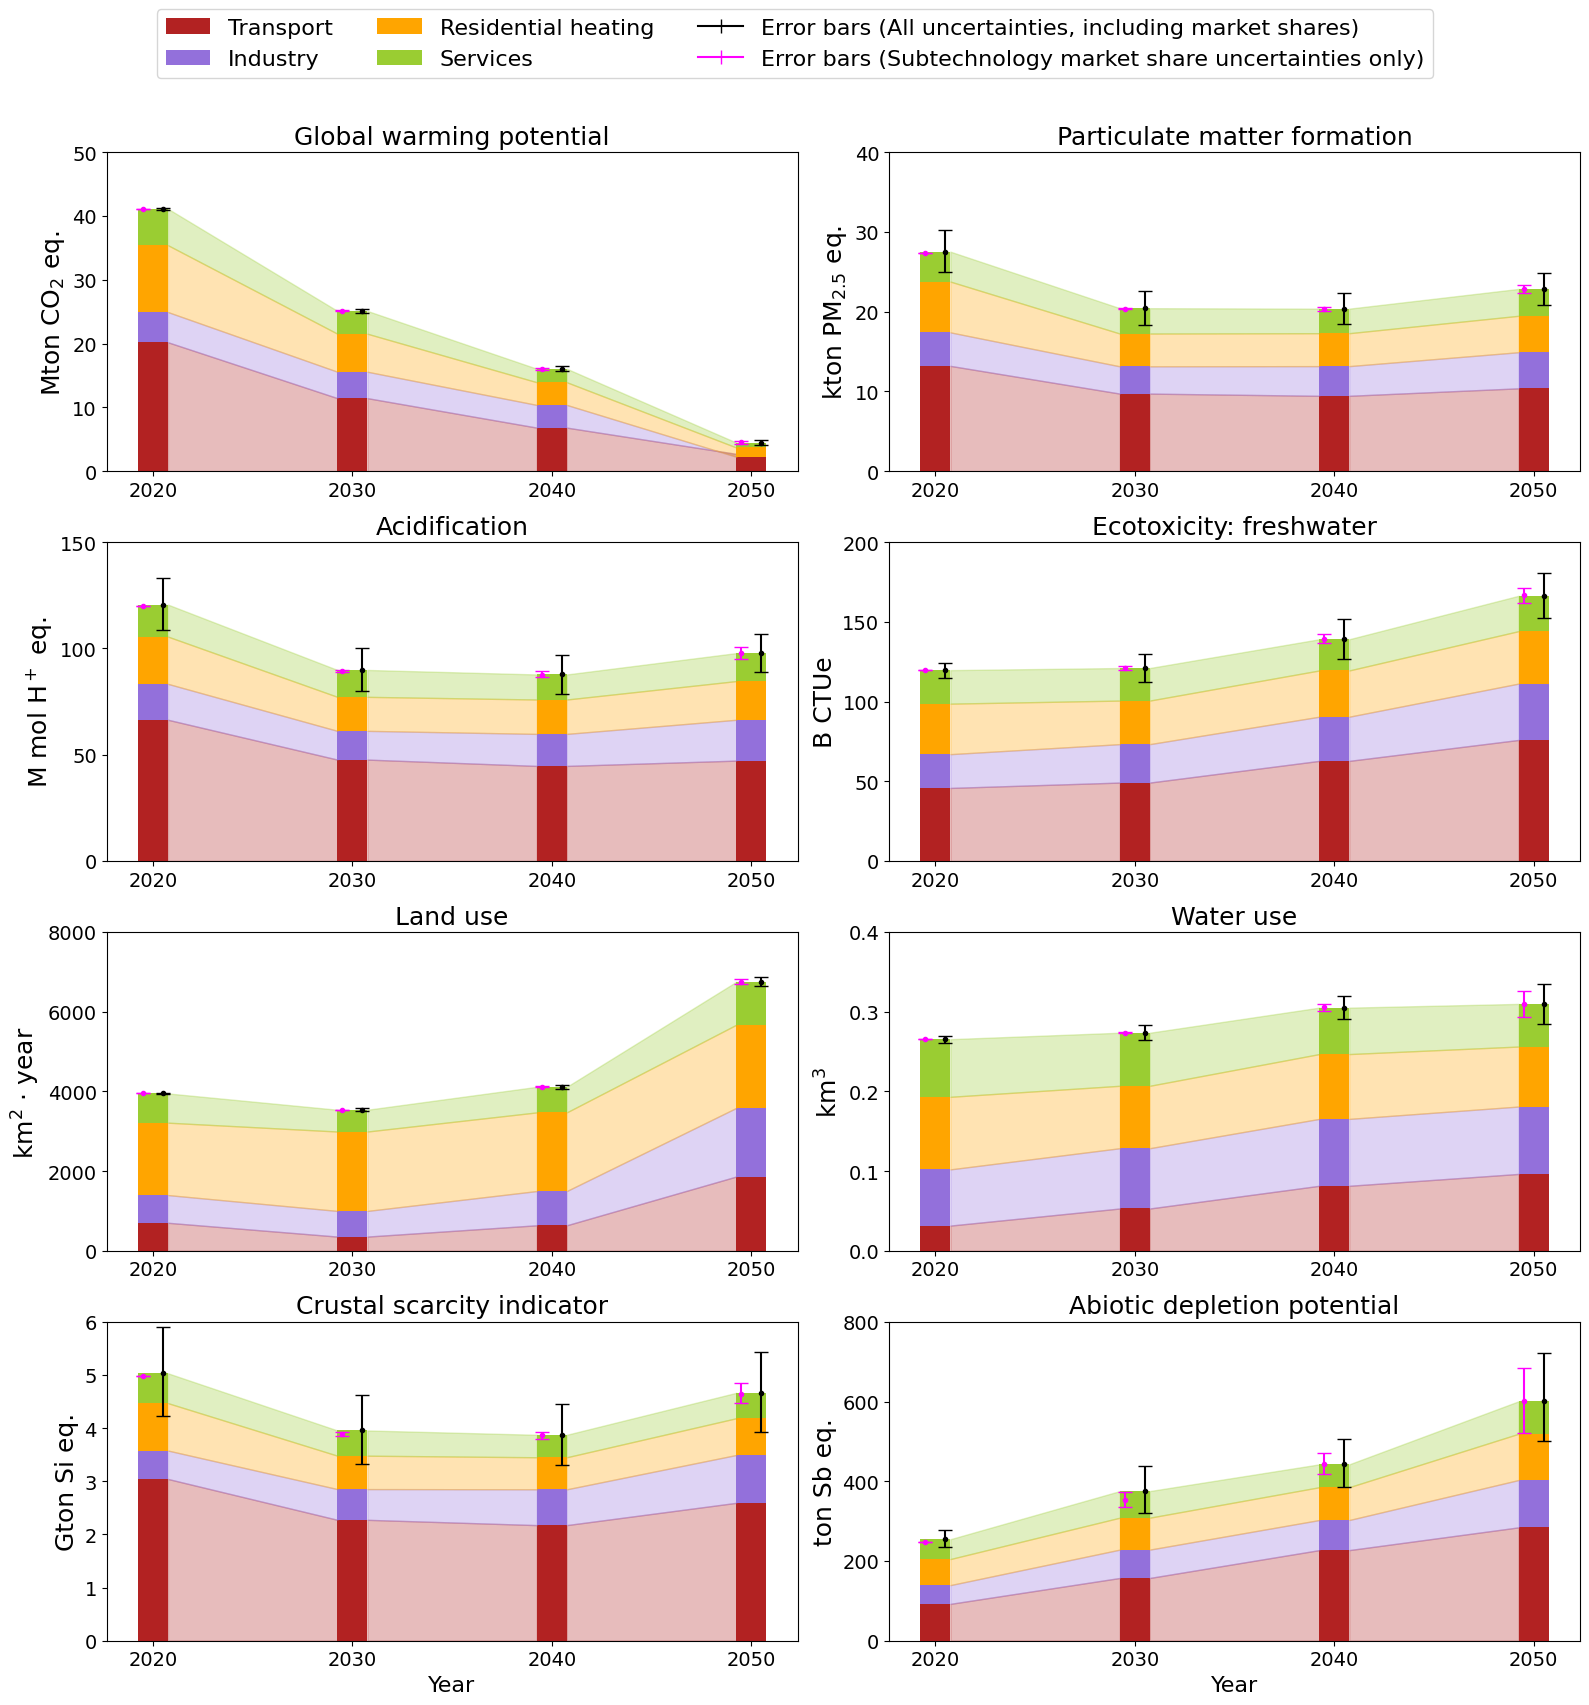

In [14]:
df_main = df_SPS1_Budg1150.copy()
df_shares = df_SPS1_Budg1150_onlyshares.copy()

# Scale the values for the main DataFrame
for cat, scale in scaling_factors.items():
    df_main.loc[df_main['impact_category'].map(impact_categories) == cat, 'value'] *= scale
    df_shares.loc[df_shares['impact_category'].map(impact_categories) == cat, 'value'] *= scale

# Filter to only include quantile = 0.5 (for the stacked bars)
df_median_main = df_main[df_main['quantile'] == 0.5]
df_median_shares = df_shares[df_shares['quantile'] == 0.5]

# Initialize subplots
fig, axes = plt.subplots(4, 2, figsize=(16, 16), constrained_layout=True)

# Flatten the axes array
axes = axes.flatten()

# Create a dictionary to hold legend handles
legend_handles = {}

# Loop over each impact category
for i, (key, label) in enumerate(impact_categories.items()):
    
    # Filter the data for the current impact category
    df_cat_main = df_median_main[df_median_main['impact_category'] == key]
    df_cat_shares = df_median_shares[df_median_shares['impact_category'] == key]
    
    # Initialize DataFrames to store the summed values for each group
    group_sums_main = pd.DataFrame(index=[2020, 2030, 2040, 2050])
    group_sums_shares = pd.DataFrame(index=[2020, 2030, 2040, 2050])

    # Group the variables and sum their contributions for both DataFrames
    for group_name, group_vars in groups_demand.items():
        valid_vars_main = [var for var in group_vars if var in df_cat_main['variable'].unique()]
        valid_vars_shares = [var for var in group_vars if var in df_cat_shares['variable'].unique()]

        df_group_main = df_cat_main[df_cat_main['variable'].isin(valid_vars_main)].groupby('year')['value'].sum()
        df_group_shares = df_cat_shares[df_cat_shares['variable'].isin(valid_vars_shares)].groupby('year')['value'].sum()

        group_sums_main[group_name] = df_group_main
        group_sums_shares[group_name] = df_group_shares
    
    # Fill NaNs with zeros (in case some years have no data for a group)
    group_sums_main = group_sums_main.fillna(0)
    group_sums_shares = group_sums_shares.fillna(0)

    # Plot the stacked bar with wider bars
    ax = axes[i]
    bottoms = np.zeros(len(group_sums_main))
    bar_width = 1.5  # Increase bar width
    x_positions = group_sums_main.index  # Get the x positions for the bars

    for j, group_name in enumerate(groups_demand.keys()):
        values = group_sums_main[group_name].values
        color = custom_colors.get(group_name, 'gray')  # Use custom colors
        bars = ax.bar(x_positions, values, bottom=bottoms, color=color, width=bar_width, label=group_name)

        # Collect legend handles
        if group_name not in legend_handles:
            legend_handles[group_name] = bars[0]

        # Apply shading between bars
        for k in range(len(x_positions) - 1):
            # Right side of the current bar to the left side of the next bar
            ax.fill_between([x_positions[k] + bar_width/2, x_positions[k+1] - bar_width/2],
                            [bottoms[k], bottoms[k+1]],
                            [bottoms[k] + values[k], bottoms[k+1] + values[k+1]],
                            color=color, alpha=0.3)

        bottoms += values

    # Error bars using quantiles 0.05 and 0.95 from df_main
    df_cat_5_main = df_main[(df_main['quantile'] == 0.05) & (df_main['impact_category'] == key)]
    df_cat_95_main = df_main[(df_main['quantile'] == 0.95) & (df_main['impact_category'] == key)]

    # Error bars using quantiles 0.05 and 0.95 from df_shares
    df_cat_5_shares = df_shares[(df_shares['quantile'] == 0.05) & (df_shares['impact_category'] == key)]
    df_cat_95_shares = df_shares[(df_shares['quantile'] == 0.95) & (df_shares['impact_category'] == key)]

    for year in group_sums_main.index:
        # Calculate the total median for df_main
        total_median_main = group_sums_main.loc[year].sum()

        # Error bars for df_main
        error_5_main = df_cat_5_main[df_cat_5_main['year'] == year]['value'].sum()
        error_95_main = df_cat_95_main[df_cat_95_main['year'] == year]['value'].sum()

        y_err_low_main = max(0, total_median_main - error_5_main)
        y_err_high_main = max(0, error_95_main - total_median_main)

        # Plotting the first set of error bars (from df_main) at the exact year position
        ax.errorbar(year + 0.5, total_median_main, yerr=[[y_err_low_main], [y_err_high_main]], capsize=5, color='black', fmt = '.')

        # Calculate the total median for df_shares
        total_median_shares = group_sums_shares.loc[year].sum()

        # # Error bars for df_shares
        error_5_shares = df_cat_5_shares[df_cat_5_shares['year'] == year]['value'].sum()
        error_95_shares = df_cat_95_shares[df_cat_95_shares['year'] == year]['value'].sum()

        y_err_low_shares = max(0, total_median_shares - error_5_shares)
        y_err_high_shares = max(0, error_95_shares - total_median_shares)

        # # Plotting the second set of error bars (from df_shares) slightly offset to the right, based on df_shares median
        ax.errorbar(year - 0.5, total_median_shares, yerr=[[y_err_low_shares], [y_err_high_shares]], capsize=5, color='#FF00FF', fmt = '.')

    # Customization for each subplot
    ax.set_title(label, fontsize=18)  # Change title font size
    ax.set_ylabel(impact_units[label], fontsize=18)  # Change y-axis label font size
    ax.tick_params(axis='both', which='major', labelsize=14)  # Change axis ticks font size

    # Set x-ticks for all plots
    ax.set_xticks([2020, 2030, 2040, 2050])

    # Set x-label only on the bottom row plots
    if i >= len(axes) - 2:  # Bottom row of plots
        ax.set_xlabel("Year", fontsize=16)  # Change x-axis label font size

    ax.set_ylim(y_limits[label])

    if label == 'Water use':
        ax.yaxis.set_major_formatter(mticker.FuncFormatter(lambda x, pos: f'{x:,.1f}'))
        ax.yaxis.set_major_locator(mticker.MaxNLocator(nbins=4))
    elif label == 'Global warming potential':
        ax.yaxis.set_major_locator(mticker.MaxNLocator(nbins=5))
    elif label == 'Acidification':
        ax.yaxis.set_major_locator(mticker.MaxNLocator(nbins=3)) 
    elif label == 'Crustal scarcity indicator':
        ax.yaxis.set_major_locator(mticker.MaxNLocator(nbins=6)) 
    elif label == 'Ecotoxicity: freshwater' or 'Particulate matter formation':
        ax.yaxis.set_major_locator(mticker.MaxNLocator(nbins=4))
    


# Adjust spacing between plots
plt.subplots_adjust(wspace=10, hspace=0.6)

# Extract handles and labels for the legend
handles = list(legend_handles.values())
labels = list(legend_handles.keys())

# Create custom legend entries for the error bars
error_main_legend = Line2D([0], [0], color='black', linestyle='-', linewidth=1.5, marker='|', markersize=10, label='Error bars (All uncertainties, including market shares)')
error_shares_legend = Line2D([0], [0], color='#FF00FF', linestyle='-', linewidth=1.5, marker='|', markersize=10, label='Error bars (Subtechnology market share uncertainties only)')


# Combine both the bar and error bar legends
handles.extend([error_main_legend, error_shares_legend])
labels.extend(['Error bars (All uncertainties, including market shares)', 'Error bars (Subtechnology market share uncertainties only)'])

# Create a single legend centered at the top of all subplots
fig.legend(handles=handles, labels=labels, loc='upper center', bbox_to_anchor=(0.5, 1.07), ncol=3, fontsize=16)

# Adjust the layout and show the plot
plt.tight_layout()

# Save the figure with the legend fully included
# plt.savefig('Figure_2_contributions_double_bar.svg', dpi=300, bbox_inches='tight')

# Show the plot
plt.show()

# Figure 2

In [15]:
relics_categories = [
    'RELICS - metals extraction - Lithium',
    'RELICS - metals extraction - Cobalt',
    'RELICS - metals extraction - Vanadium',
    'RELICS - metals extraction - Platinum',
    'RELICS - metals extraction - Iridium',
    'RELICS - metals extraction - Silver',
    'RELICS - metals extraction - Gallium',
    'RELICS - metals extraction - Neodymium',
    'RELICS - metals extraction - Sulfur'
]

impact_categories = {col: col.split(' - ')[-1] for col in relics_categories}
impact_categories

{'RELICS - metals extraction - Lithium': 'Lithium',
 'RELICS - metals extraction - Cobalt': 'Cobalt',
 'RELICS - metals extraction - Vanadium': 'Vanadium',
 'RELICS - metals extraction - Platinum': 'Platinum',
 'RELICS - metals extraction - Iridium': 'Iridium',
 'RELICS - metals extraction - Silver': 'Silver',
 'RELICS - metals extraction - Gallium': 'Gallium',
 'RELICS - metals extraction - Neodymium': 'Neodymium',
 'RELICS - metals extraction - Sulfur': 'Sulfur'}

In [16]:
# y_limits = {
#     'Lithium': (0, 4e6),
#     'Cobalt': (0, 2.5e6),
#     'Vanadium': (0, 60000),
#     'Platinum': (0, 6000),
#     'Palladium': (0, 18000),
#     'Iridium': (0, 120),
#     'Neodymium': (0, 30000),
#     'Gallium': (0, 10e5),
#     'Sulfur': (0, 1e8)
# }

scaled_y_limits = {
    'Lithium': (0, 4),
    'Cobalt': (0, 3),
    'Vanadium': (0, 400),
    'Platinum': (0, 3),
    # 'Palladium': (0, 18),
    'Silver':(0, 100),
    'Iridium': (0, 150),
    'Neodymium': (0, 25),
    'Gallium': (0, 60),
    'Sulfur': (0, 140),
    
}

y_axis_labels = {
    'Lithium': 'kilotons',
    'Cobalt': 'kilotons',
    'Vanadium': 'tons',
    'Platinum': 'tons',
    # 'Palladium': 'tons',
    'Silver': 'tons',
    'Iridium': 'kilograms',
    'Neodymium': 'tons',
    'Gallium': 'tons',
    'Sulfur': 'kilotons',
}

scaling_factors = {
    'Lithium': 1e-6,
    'Cobalt': 1e-6,
    'Vanadium': 1e-3,
    'Platinum': 1e-3,
    # 'Palladium': 1e-3,
    'Silver': 1e-3,
    'Iridium':1,
    'Neodymium': 1e-3,
    'Gallium': 1e-3,
    'Sulfur': 1e-6, 
}

In [17]:
human_friendly_labels = {
    # Transport
    'FE_bus_diesel': 'Bus (Diesel)',
    'FE_cars_diesel': 'Cars (Diesel)',
    'FE_cars_gasoline': 'Cars (Gasoline)   \n',
    'FE_coach_diesel': 'Coach (Diesel)',
    'FE_heavy_duty_truck_diesel': 'Heavy Duty Truck\n(Diesel)',
    'FE_heavy_duty_truck_gas': 'Heavy Duty Truck (Gas)',
    'FE_light_duty_truck_diesel': 'Light Duty\nTruck (Diesel)',
    'FE_light_duty_truck_gasoline': 'Light Duty\nTruck (Gasoline)',
    'FE_motorcycle_gasoline': 'Motorcycle (Gasoline)',
    'FE_other_transport_diesel': 'Other Transport\n(Diesel)',
    'FE_other_transport_gasoline': 'Other Transport\n(Gasoline)',
    'FE_coach_gas': 'Coach (Gas)',
    'FE_light_duty_truck_gas': 'Light Duty\nTruck (Gas)',
    'FE_cars_gas': 'Cars (Gas)',
    'FE_bus_gas': 'Bus (Gas)',
    'FE_cars_hydrogen': 'Cars (Hydrogen)',
    'FE_coach_hydrogen': 'Coach (Hydrogen)',
    'FE_heavy_duty_truck_hydrogen': 'Heavy Duty Truck (Hydrogen)',
    'FE_light_duty_truck_hydrogen': 'Light Duty Truck (Hydrogen)',
    'FE_bus_hydrogen': 'Bus (Hydrogen)',
    'FE_other_transport_hydrogen': 'Other Transport (Hydrogen)',
    'FE_motorcycle_hydrogen': 'Motorcycle (Hydrogen)',
    'FE_bus_electricity': 'Bus (Electricity)',
    'FE_cars_electricity': 'Cars (Electricity)',
    'FE_heavy_duty_truck_electricity': 'Heavy Duty Truck (Electricity)',
    'FE_light_duty_truck_electricity': 'Light Duty Truck\n(Electricity)',
    'FE_other_transport_electric': '\n\n   Other Transport\n       (Electricity)',
    'FE_tram': 'Tram',
    'FE_trolleybus': 'Trolleybus',
    'FE_coach_electricity': 'Coach (Electricity)',
    'FE_motorcycle_electric': 'Motorcycle (Electricity)',

    # Industry
    'FE_industry_heat_CHP_gas': 'Heat (CHP Gas)',
    'FE_industry_heat_CHP_oil': 'Heat (CHP Oil)',
    'FE_industry_heat_CHP_waste_non_renew': 'Heat (CHP Waste Non-Renew)',
    'FE_industry_heat_CHP_waste_non_renew_CCS': 'Heat (CHP Waste Non-Renew CCS)',
    'FE_industry_process_coal': 'Process (Coal)',
    'FE_industry_process_heavy_fuel_oil': 'Process (Heavy Fuel Oil)',
    'FE_industry_process_light_fuel_oil': 'Process (Light Fuel Oil)',
    'FE_industry_process_natural_gas': 'Process (Natural Gas)',
    'FE_industry_process_waste_non_renew': 'Process (Waste Non-Renew)',
    'FE_industry_heat_DH': 'District\n Heating',
    'FE_industry_heat_CHP_gas_CCS': 'Heat (CHP Gas CCS)',
    'FE_industry_process_FE_other_electric': '\nElectric \nindustrial process',
    'FE_industry_process_electric_boiler': 'Process (Electric Boiler)',
    'FE_industry_process_heat_pump': 'Process (Heat Pump)',
    'FE_industry_heat_CHP_hydrogen': 'Heat (CHP Hydrogen)',
    'FE_industry_process_hydrogen': 'Process (Hydrogen)',
    'FE_industry_process_solar': 'Process (Solar)',
    'FE_industry_heat_CHP_fuel_cell': 'Heat (CHP Fuel Cell)',
    'FE_industry_heat_CHP_wood': 'Heat (CHP Wood)',
    'FE_industry_heat_CHP_wood_CCS': 'Heat (CHP Wood CCS)',
    'FE_industry_process_pellet': 'Process (Pellet)',
    'FE_industry_process_wood': 'Process (Wood)',
    'FE_industry_process_waste_renew': 'Process (Waste Renew)',

    # Residential Heating
    'FE_residential_space_heating_CHP_gas': 'Space Heating (CHP Gas)',
    'FE_residential_space_heating_gas': 'Space Heating (Gas)',
    'FE_residential_space_heating_light_fuel_oil': 'Space Heating (Light Fuel Oil)',
    'FE_residential_water_heating_gas': 'Water Heating (Gas)',
    'FE_residential_water_heating_light_fuel_oil': 'Water Heating (Light Fuel Oil)',
    'FE_residential_space_heating_heat_pump_gas': 'Space Heating (Heat Pump Gas)',
    'FE_residential_water_heating_heat_pump_gas': 'Water Heating (Heat Pump Gas)',
    'FE_residential_space_heating_DH': 'District\n Heating',
    'FE_residential_water_heating_coal': 'Water Heating (Coal)',
    'FE_residential_space_heating_coal': 'Space Heating (Coal)',
    'FE_residential_space_heating_pellet': 'Space Heating (Pellet)',
    'FE_residential_space_heating_wood': 'Space Heating (Wood)',
    'FE_residential_water_heating_pellet': 'Water Heating (Pellet)',
    'FE_residential_water_heating_wood': 'Water Heating\n (Wood)',
    'FE_residential_space_heating_CHP_wood': 'Space Heating (CHP Wood)',
    'FE_residential_water_heating_solar': 'Water Heating (Solar)',
    'FE_residential_space_heating_solar': 'Space Heating (Solar)',
    'FE_residential_FE_other_electric': '\nElectric heating,\nunspecified',
    'FE_residential_space_heating_electric_boiler': 'Space Heating (Electric Boiler)',
    'FE_residential_space_heating_heat_pump': 'Space Heating (Heat Pump)',
    'FE_residential_water_heating_electric_boiler': 'Water Heating (Electric Boiler)',
    'FE_residential_water_heating_heat_pump': 'Water Heating (Heat Pump)',
    'FE_residential_space_heating_CHP_fuel_cell': 'Space Heating (CHP Fuel Cell)',
    'FE_residential_water_heating_hydrogen': 'Water Heating (Hydrogen)',

    # Services
    'FE_services_CHP_gas': 'CHP Gas',
    'FE_services_light_fuel_oil': 'Light Fuel Oil',
    'FE_services_natural_gas': 'Natural Gas',
    'FE_services_DH': 'District\n Heating',
    'FE_services_CHP_hydrogen': 'CHP Hydrogen',
    'FE_services_CHP_fuel_cell': 'CHP Fuel Cell',
    'FE_services_hydrogen': 'Hydrogen',
    'FE_services_CHP_biogas': 'CHP Biogas',
    'FE_services_pellet': 'Pellet',
    'FE_services_wood': 'Wood',
    'FE_services_CHP_wood': 'CHP Wood',
    'FE_services_other_electric': 'Electric service,\nunspecified',
    'FE_services_electric_boiler': 'Electric Boiler',
    'FE_services_heat_pump': 'Heat Pump',
    'FE_services_solar': 'Solar',
}


In [18]:
# # Get all unique variables in df_total_median
# variables_in_median = df_total_median.index.unique()

# # Check for missing variables in human_friendly_labels
# missing_labels = [var for var in variables_in_median if var not in human_friendly_labels]

# # Print missing labels, if any
# if missing_labels:
#     print("Missing labels in human_friendly_labels:")
#     for label in missing_labels:
#         print(label)
# else:
#     print("All variables have corresponding labels in human_friendly_labels.")

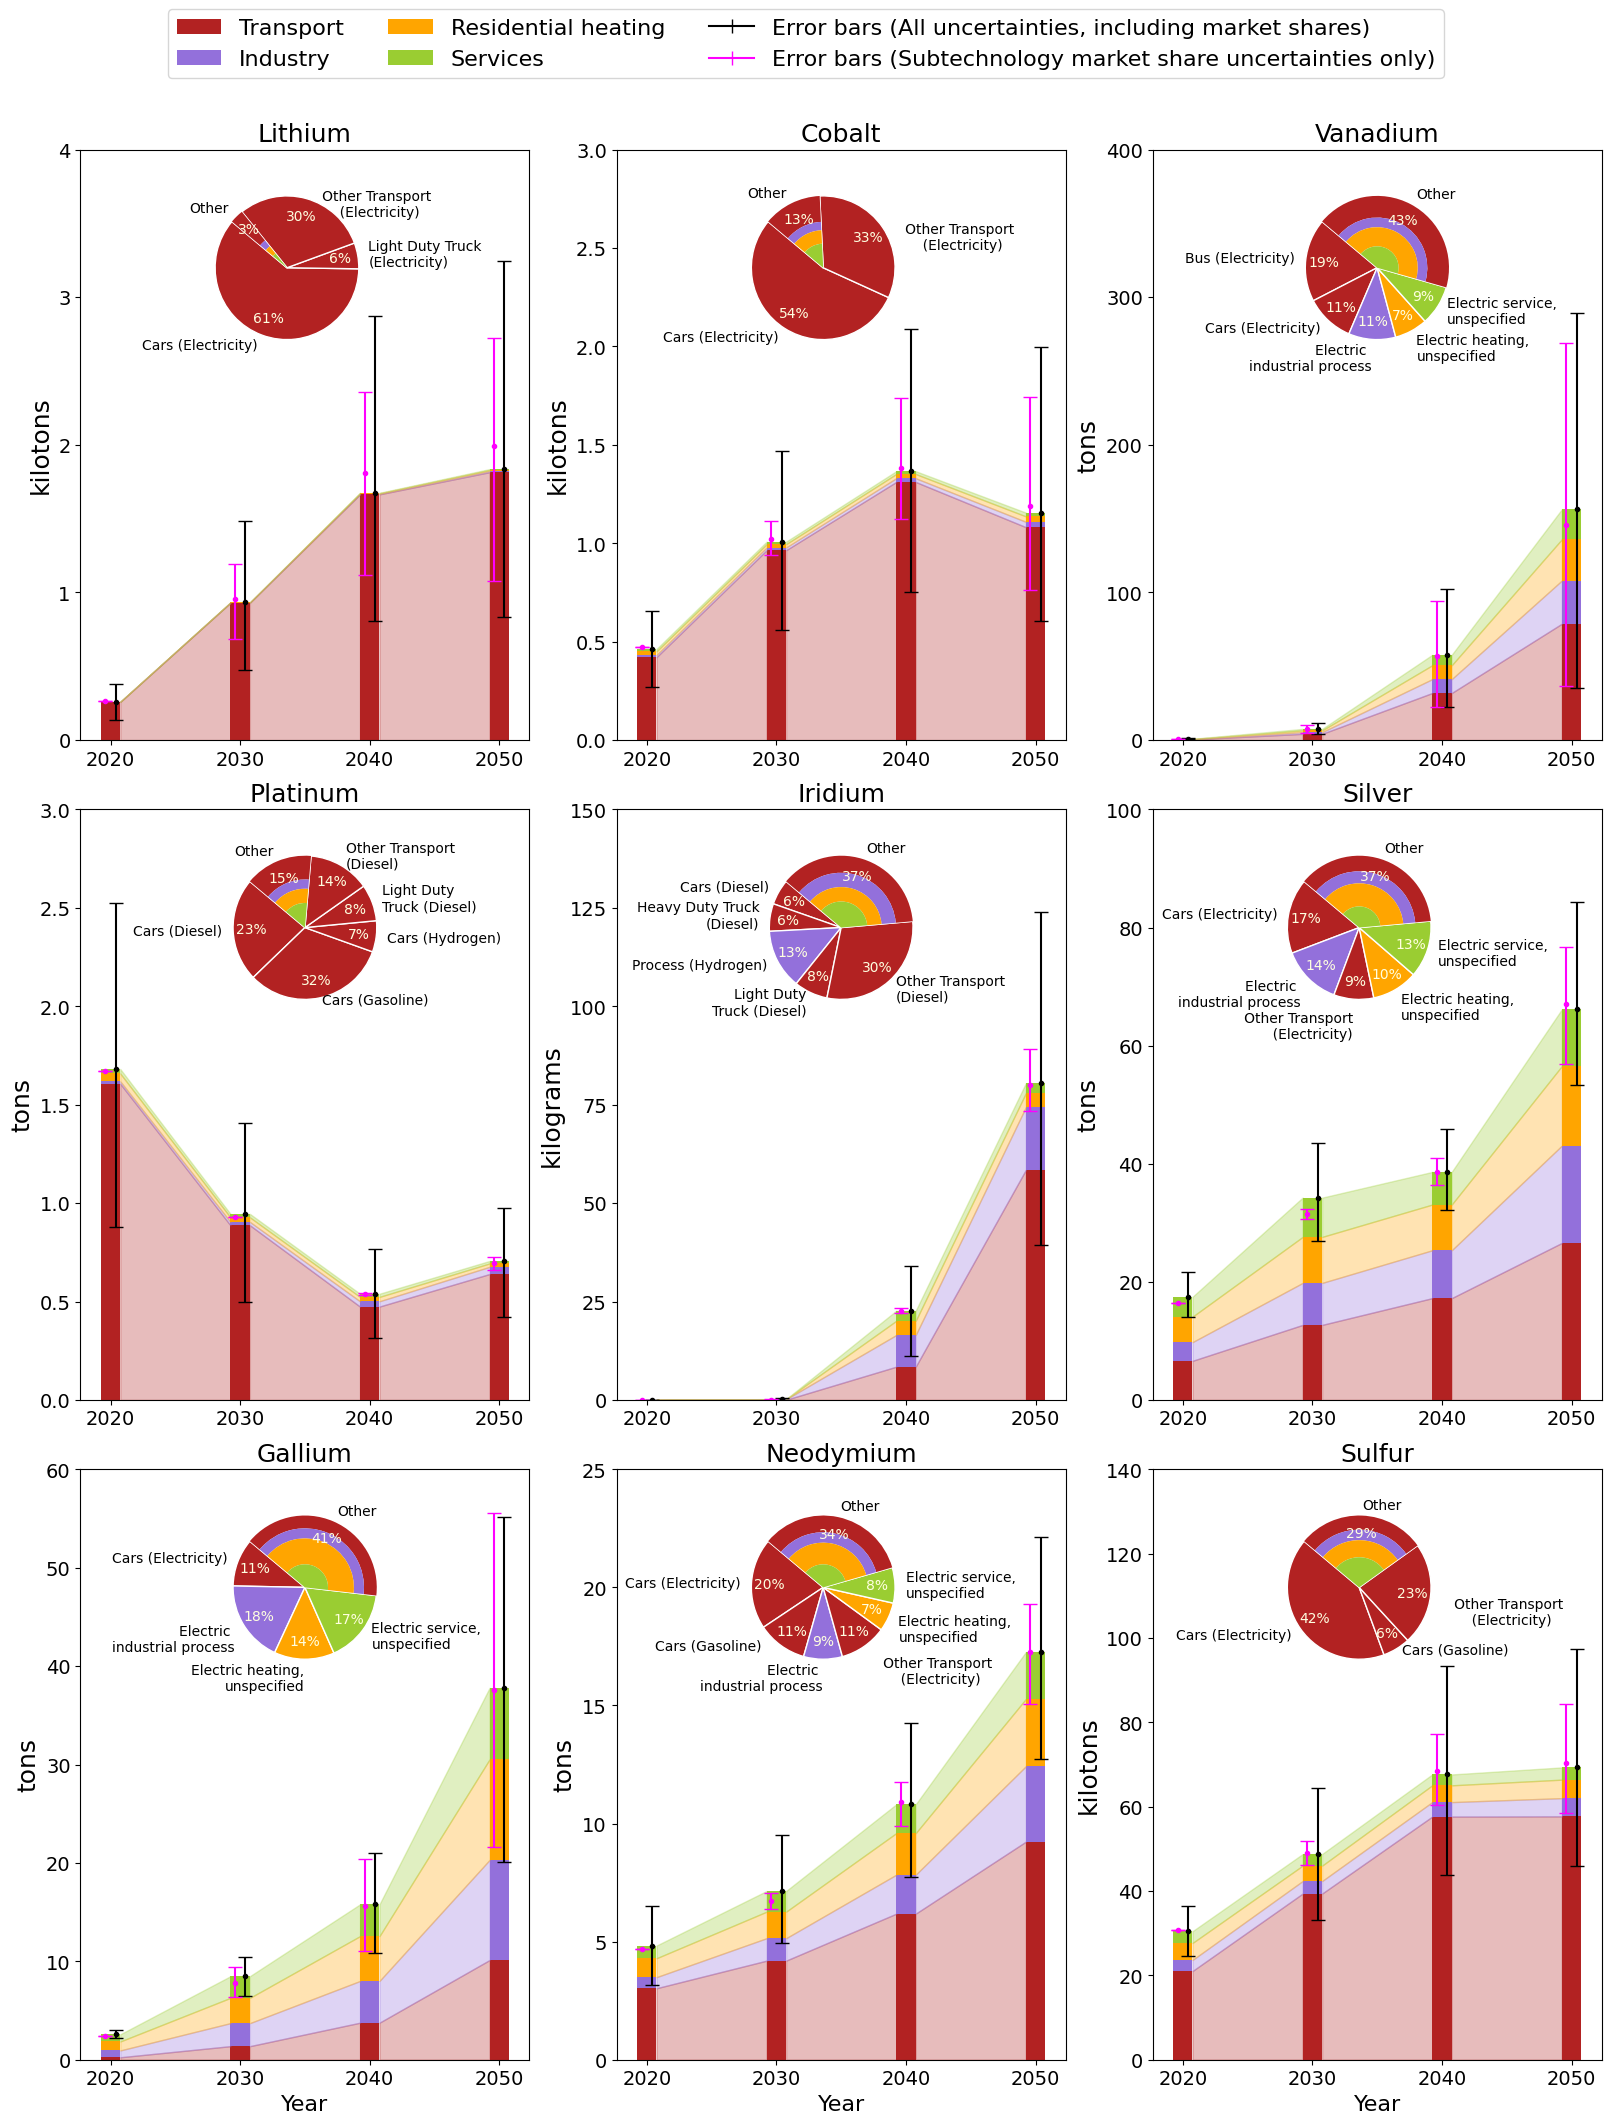

In [19]:
df = df_SPS1_Budg1150.copy()
df_shares = df_SPS1_Budg1150_onlyshares.copy()

# Filter the DataFrame to include only the selected relics categories and quantile = 0.5
df_median = df[(df['impact_category'].isin(relics_categories)) & (df['quantile'] == 0.5)]
df_median_shares = df_shares[(df_shares['impact_category'].isin(relics_categories)) & (df_shares['quantile'] == 0.5)]


fig, axes = plt.subplots(3, 3, figsize=(16, 20), constrained_layout=True)  # Increase figure size

# Flatten the axes array
axes = axes.flatten()

# Loop over each impact category
for i, (key, label) in enumerate(impact_categories.items()):

    # Filter the data for the current impact category
    df_cat = df_median[df_median['impact_category'] == key].copy()
    df_cat_5 = df[(df['quantile'] == 0.05) & (df['impact_category'] == key)].copy()
    df_cat_95 = df[(df['quantile'] == 0.95) & (df['impact_category'] == key)].copy()

    df_cat_shares_5 = df_shares[(df_shares['quantile'] == 0.05) & (df_shares['impact_category'] == key)].copy()
    df_cat_shares_95 = df_shares[(df_shares['quantile'] == 0.95) & (df_shares['impact_category'] == key)].copy()
    df_cat_shares_median = df_shares[(df_shares['quantile'] == 0.5) & (df_shares['impact_category'] == key)].copy()

    # Apply scaling
    scale = scaling_factors.get(label, 1)
    df_cat['value'] *= scale
    df_cat_5['value'] *= scale
    df_cat_95['value'] *= scale
    df_cat_shares_5['value'] *= scale
    df_cat_shares_95['value'] *= scale
    df_cat_shares_median['value'] *= scale

    # Initialize DataFrames to store the summed values for each group
    group_sums = pd.DataFrame(index=[2020, 2030, 2040, 2050])

    # Group the variables and sum their contributions for both DataFrames
    for group_name, group_vars in groups_demand.items():
        valid_vars = [var for var in group_vars if var in df_cat['variable'].unique()]
        df_group = df_cat[df_cat['variable'].isin(valid_vars)].groupby('year')['value'].sum()
        group_sums[group_name] = df_group
    
    # Fill NaNs with zeros (in case some years have no data for a group)
    group_sums = group_sums.fillna(0)

    # Plot the stacked bar
    ax = axes[i]
    bottoms = np.zeros(len(group_sums))
    bar_width = 1.5  # Increase bar width
    x_positions = group_sums.index  # Get the x positions for the bars

    for j, group_name in enumerate(groups_demand.keys()):
        values = group_sums[group_name].values
        color = custom_colors.get(group_name, 'gray')  # Use custom colors
        bars = ax.bar(x_positions, values, bottom=bottoms, color=color, width=bar_width, label=group_name)

        # Apply shading between bars
        for k in range(len(x_positions) - 1):
            ax.fill_between([x_positions[k] + bar_width / 2, x_positions[k + 1] - bar_width / 2],
                            [bottoms[k], bottoms[k + 1]],
                            [bottoms[k] + values[k], bottoms[k + 1] + values[k + 1]],
                            color=color, alpha=0.3)

        bottoms += values

    # Error bars using quantiles 0.05 and 0.95 from df
    for j, year in enumerate(group_sums.index):
        total_median_main = group_sums.loc[year].sum()

        error_5_main = df_cat_5[df_cat_5['year'] == year]['value'].sum()
        error_95_main = df_cat_95[df_cat_95['year'] == year]['value'].sum()

        y_err_low_main = max(0, total_median_main - error_5_main)
        y_err_high_main = max(0, error_95_main - total_median_main)

        # First set of error bars for main data
        ax.errorbar(year + 0.4, total_median_main, yerr=[[y_err_low_main], [y_err_high_main]], capsize=5, color='black', fmt='.')

        # Second set of error bars for shares data
        total_median_shares = df_cat_shares_median[df_cat_shares_median['year'] == year]['value'].sum()
        error_5_shares = df_cat_shares_5[df_cat_shares_5['year'] == year]['value'].sum()
        error_95_shares = df_cat_shares_95[df_cat_shares_95['year'] == year]['value'].sum()

        y_err_low_shares = max(0, total_median_shares - error_5_shares)
        y_err_high_shares = max(0, error_95_shares - total_median_shares)

        ax.errorbar(year - 0.4, total_median_shares, yerr=[[y_err_low_shares], [y_err_high_shares]], capsize=5, color='#FF00FF', fmt='.')

    # Customization for each subplot
    ax.set_title(label, fontsize=18)  # Change title font size
    y_axis_label = y_axis_labels.get(label, 'kilograms')
    ax.set_ylabel(y_axis_label, fontsize=18)  # Adjust y-axis label based on scaling
    ax.tick_params(axis='both', which='major', labelsize=14)  # Change axis ticks font size

    # Set x-ticks for all plots
    ax.set_xticks([2020, 2030, 2040, 2050])

    # Set x-label only on the bottom row plots
    if i >= len(axes) - 3:  # Bottom row of plots
        ax.set_xlabel("Year", fontsize=16)  # Change x-axis label font size

    # Set y-axis limits based on scaled limits
    ax.set_ylim(scaled_y_limits.get(label, scaled_y_limits[label]))

    if label == 'Cobalt':
        ax.set_yticks([0, 0.5, 1, 1.5, 2, 2.5, 3])
    elif label == 'Platinum':
        ax.set_yticks([0, 0.5, 1, 1.5, 2, 2.5, 3])
    elif label == 'Vanadium':
        ax.set_yticks([0, 100, 200, 300, 400])
    elif label == 'Lithium':
        ax.set_yticks([0,1,2,3,4])
    elif label == 'Neodymium':
        ax.set_yticks([0, 5, 10, 15, 20, 25])
    elif label == 'Iridium':
        ax.set_yticks([0, 25, 50, 75, 100, 125, 150])
    else:
        ax.yaxis.set_major_formatter(mticker.FuncFormatter(lambda x, pos: f'{x:,.0f}'))

    # Calculate total cumulative demand across all years using the median data
    df_total_median = df_cat.groupby('variable')['value'].sum()

    # Filter out groups contributing less than 5%
    df_total_filtered = df_total_median[df_total_median / df_total_median.sum() > 0.05]
    df_total_others = df_total_median[df_total_median / df_total_median.sum() <= 0.05].sum()

    # Combine the filtered groups with 'Others'
    pie_data = pd.concat([df_total_filtered, pd.Series(df_total_others, index=['Other'])])

    # Replace variable names with human-friendly labels in pie_data
    pie_labels = [human_friendly_labels.get(var, var) for var in pie_data.index]

    # Create the pie chart as an inset within the same axes, center top
    if label in ['Sulfur', 'Neodymium', 'Lithium','Silver']:
        inset_ax = ax.inset_axes([0.26, 0.6, 0.4, 0.4], aspect='equal')  # Move to the left
    elif label in ['Cobalt']:
        inset_ax = ax.inset_axes([0.26, 0.6, 0.4, 0.4], aspect='equal')  # Move to the left
    else:
        inset_ax = ax.inset_axes([0.3, 0.6, 0.4, 0.4], aspect='equal')  # Default position

    # pie_colors for normal groups
    pie_colors = []
    for var in pie_data.index:
        if var == 'Other':
            pie_colors.append('none')  # We will handle "Other" separately below
        else:
            group_name = next((group for group, variables in groups_demand.items() if var in variables), None)
            color = custom_colors.get(group_name, 'gray')
            pie_colors.append(color)

    # Plot the pie chart (excluding "Other" for now)
    wedges, texts, autotexts = inset_ax.pie(
        pie_data,
        labels=pie_labels,
        autopct=lambda p: '{:.0f}%'.format(p) if p > 0 else '',
        colors=pie_colors,
        startangle=140,
        textprops={'fontsize': 10},
        wedgeprops={'edgecolor': 'white'},
        labeldistance=1.15,
        pctdistance=0.75
    )

    for autotext in autotexts:
        autotext.set_color('#FFFFE0')

    # Handle the "Other" slice: split it into segments based on group contributions
    if 'Other' in pie_data.index:
        other_wedge = [w for w, l in zip(wedges, pie_labels) if l == 'Other'][0]
        theta1, theta2 = other_wedge.theta1, other_wedge.theta2
        center = other_wedge.center
        outer_radius = other_wedge.r
        total_other_value = pie_data['Other']
    
        # Calculate the proportions of each group contributing to "Other"
        other_group_values = df_total_median[df_total_median / df_total_median.sum() <= 0.05]
    
        proportions = {
            'Transport': other_group_values[other_group_values.index.isin(groups_demand['Transport'])].sum() / total_other_value,
            'Industry': other_group_values[other_group_values.index.isin(groups_demand['Industry'])].sum() / total_other_value,
            'Residential heating': other_group_values[other_group_values.index.isin(groups_demand['Residential heating'])].sum() / total_other_value,
            'Services': other_group_values[other_group_values.index.isin(groups_demand['Services'])].sum() / total_other_value
        }
    
        # Ensure proper assignment of any unmapped variables
        unmapped_vars = other_group_values[~other_group_values.index.isin(
            [var for group in groups_demand.values() for var in group])]
    
        if not unmapped_vars.empty:
            raise ValueError(f"Some variables are not assigned to any group: {unmapped_vars.index.tolist()}")
    
        # Calculate total area of the "Other" slice (A = π * r^2)
        total_area = np.pi * outer_radius ** 2
        current_radius = outer_radius
    
        # Calculate the area of each group and ensure rings fit perfectly without gaps
        current_area = total_area
    
        # Keep track of how many groups we've processed
        num_groups = len(proportions)
        for idx, (group_name, proportion) in enumerate(proportions.items()):
            color = custom_colors.get(group_name)
            if not color:
                raise ValueError(f"Missing color for group: {group_name}")
    
            # Calculate the area for this group's contribution
            if idx < num_groups - 1:
                group_area = proportion * total_area
            else:
                # The last group gets the remaining area
                group_area = current_area
    
            # Calculate the new inner radius based on the area of the ring
            new_inner_radius = np.sqrt((current_area - group_area) / np.pi)
    
            # Ensure that the new radius is a valid positive number
            if new_inner_radius < 0 or np.isnan(new_inner_radius):
                print(f"Warning: Invalid radius calculation for group '{group_name}'. Setting to 0.")
                new_inner_radius = 0
    
            # Draw the wedge ring for this group
            wedge = patches.Wedge(
                center=center,
                r=current_radius,        # Outer radius of the current ring
                theta1=theta1,
                theta2=theta2,
                width=current_radius - new_inner_radius,  # Ring width to fit the area proportionally
                facecolor=color,
                # edgecolor='white'
            )
            inset_ax.add_patch(wedge)
    
            # Update the current radius and area for the next inner ring
            current_radius = new_inner_radius
            current_area = np.pi * current_radius ** 2
    
            # Print values for debugging and verification
            # print(f"Drawing ring for {group_name}:")
            # print(f"  Group Area: {group_area:.4f}")
            # print(f"  Outer radius: {current_radius:.4f}")
            # print(f"  Inner radius: {new_inner_radius:.4f}")


# Adjust the spacing between plots manually
# plt.subplots_adjust(wspace=0.3, hspace=0.3)

# Extract handles and labels for the legend
handles = list(legend_handles.values())
labels = list(legend_handles.keys())

# Create custom legend entries for the error bars
error_main_legend = Line2D([0], [0], color='black', linestyle='-', linewidth=1.5, marker='|', markersize=10, label='Error bars (All uncertainties, including market shares)')
error_shares_legend = Line2D([0], [0], color='#FF00FF', linestyle='-', linewidth=1.5, marker='|', markersize=10, label='Error bars (Subtechnology market share uncertainties only)')


# Combine both the bar and error bar legends
handles.extend([error_main_legend, error_shares_legend])
labels.extend(['Error bars (All uncertainties, including market shares)', 'Error bars (Subtechnology market share uncertainties only)'])

# Create a single legend centered at the top of all subplots
fig.legend(handles=handles, labels=labels, loc='upper center', bbox_to_anchor=(0.5, 1.06), ncol=3, fontsize=16)

# Save the figure with the legend fully included
# plt.savefig('Figure_1_contributions_with_pie.svg', dpi=300, bbox_inches='tight')

# Show the plot
plt.show()

# Figure 3

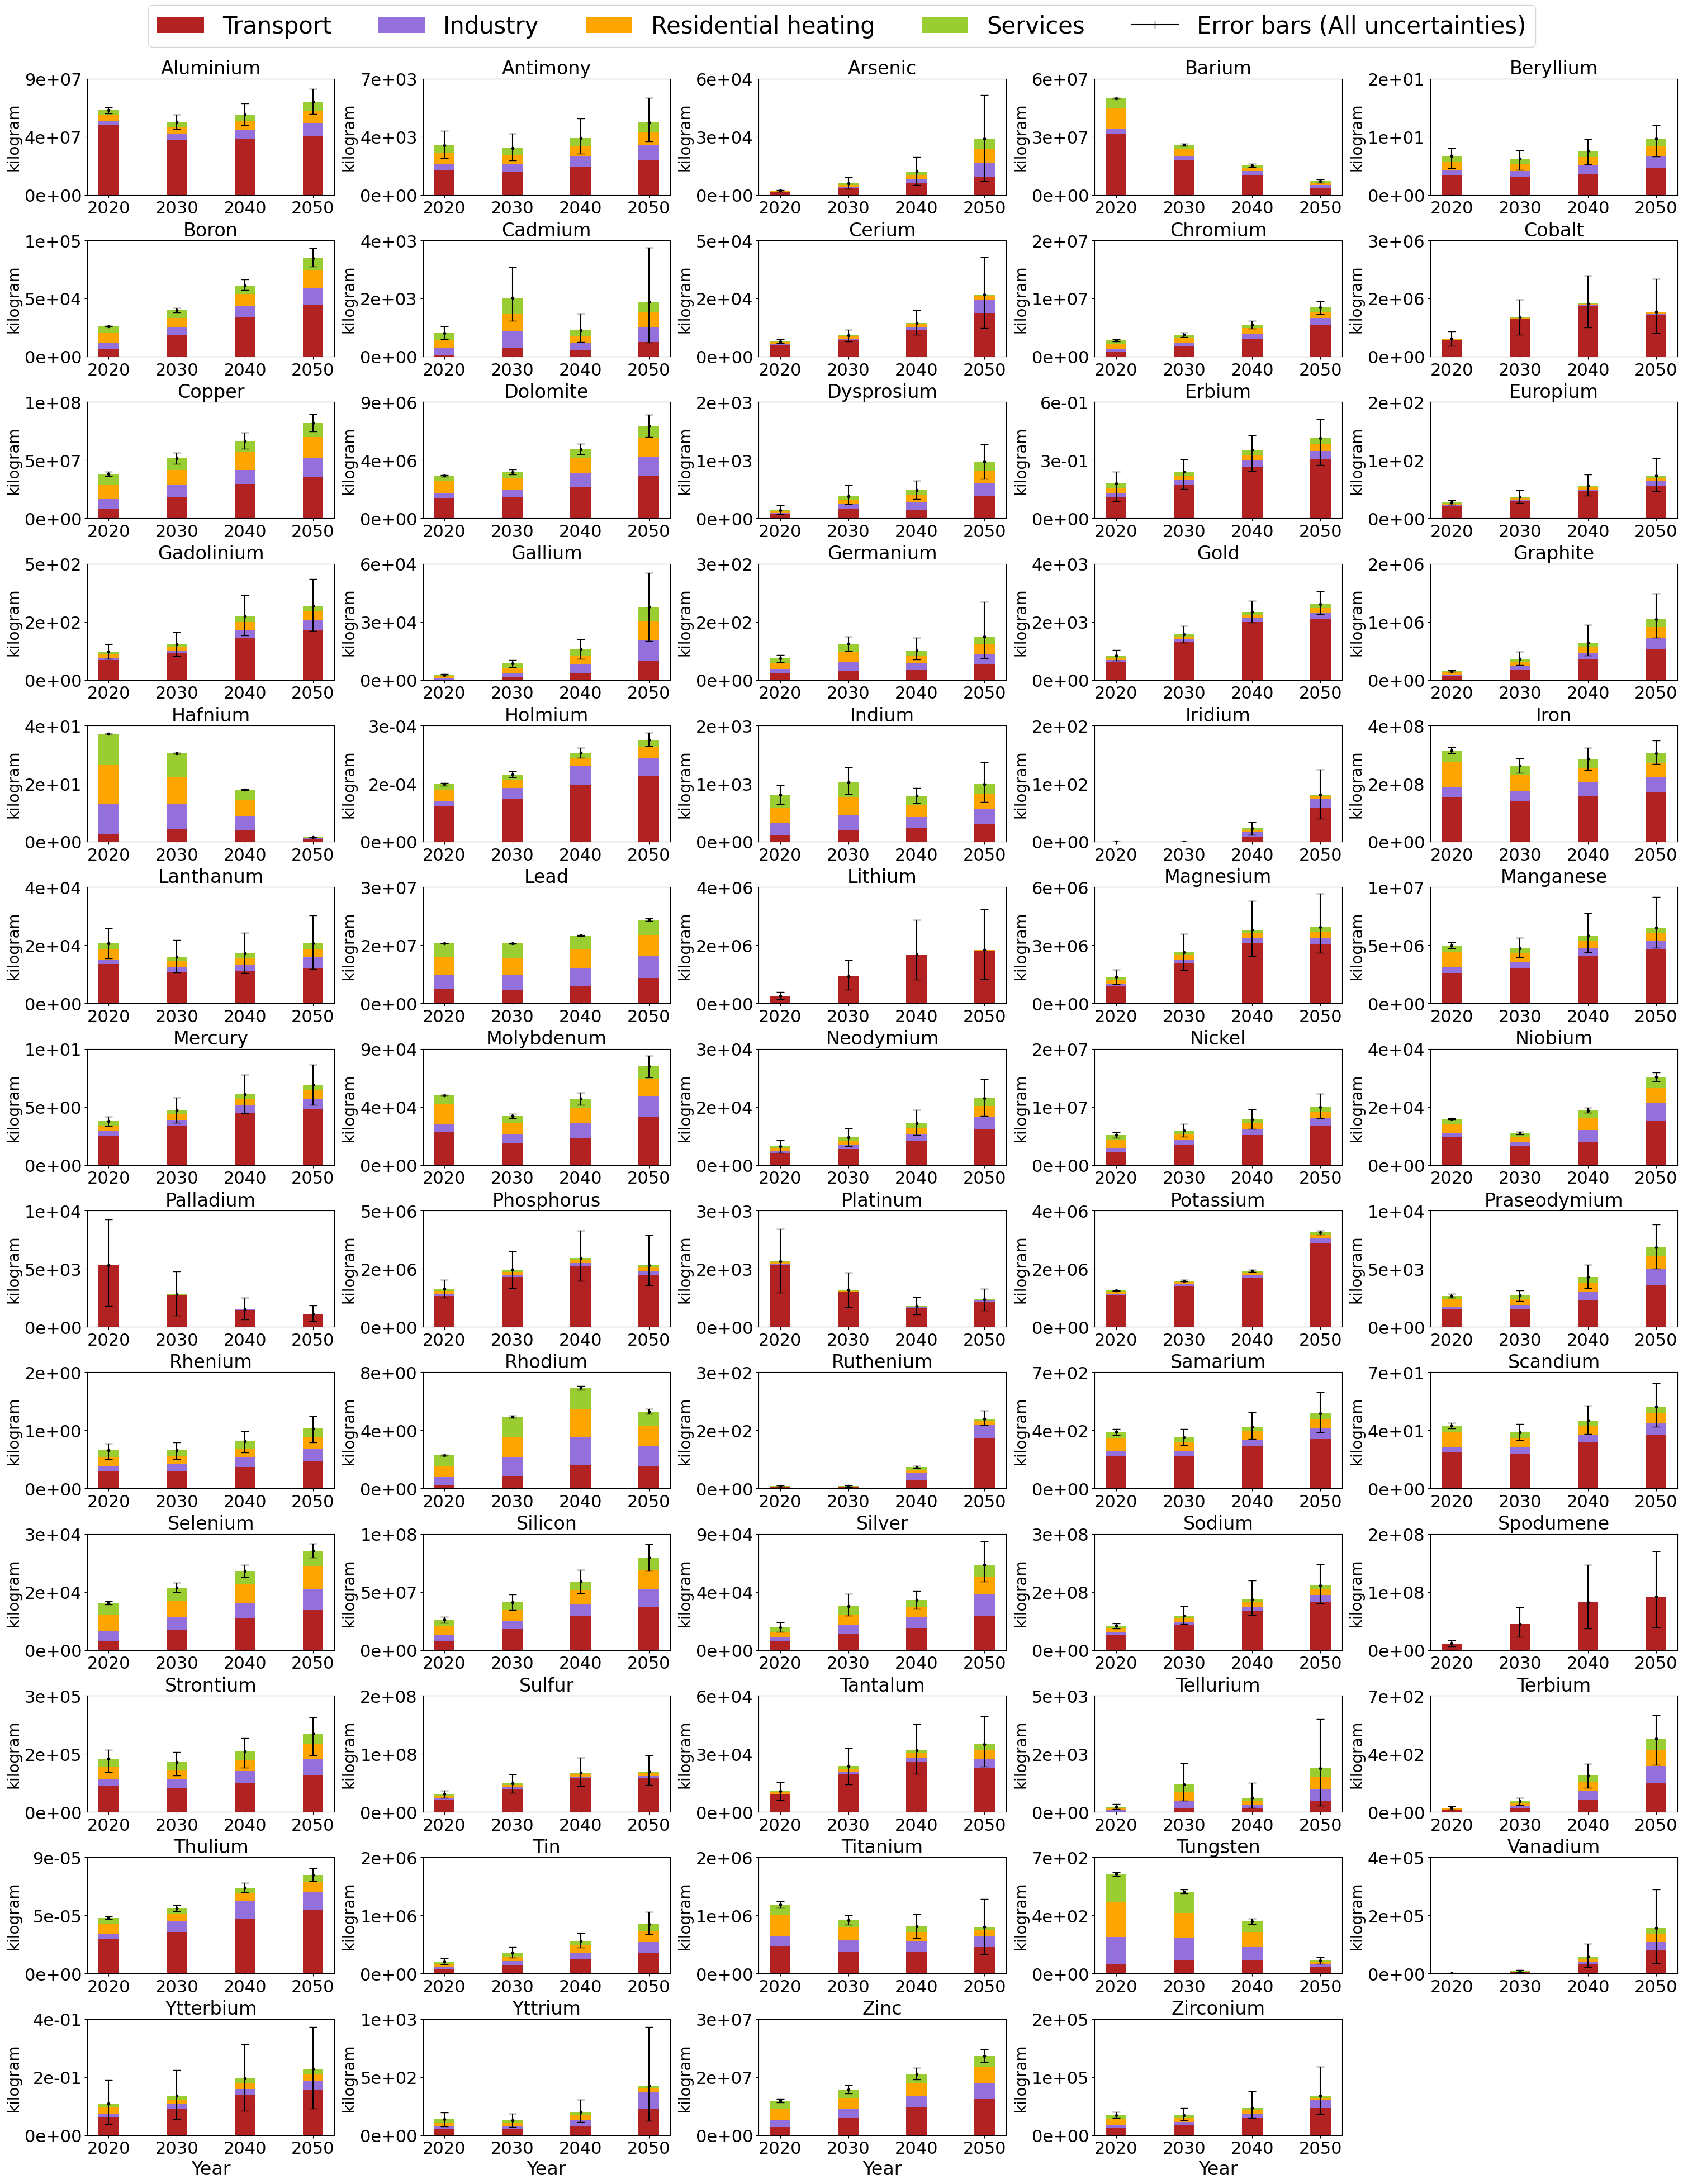

In [20]:
df = df_SPS1_Budg1150.copy()
df_shares = df_SPS1_Budg1150_onlyshares.copy()

# Filter the impact categories, excluding "Germanium" and "Rubidium", and sort alphabetically by label
impact_categories = {col: col.split(' - ')[-1] for col in df['impact_category'].unique() 
                     if 'RELICS' in col and 'Rubidium' not in col}
impact_categories = dict(sorted(impact_categories.items(), key=lambda x: x[1]))

n_categories = len(impact_categories)  # Number of categories to plot
n_rows = (n_categories // 5) + 1  # Calculate number of rows based on the number of categories
fig, axes = plt.subplots(13, 5, figsize=(30, 38), constrained_layout=True)  # Create 5x13 plots

def round_up_to_nice_value(value):
    if value == 0:
        return 0
    exponent = math.floor(math.log10(value))  # Find the order of magnitude
    factor = math.ceil(value / (10 ** exponent))  # Get the next integer factor
    return factor * (10 ** exponent)  # Reconstruct the rounded value

axes = axes.flatten()
for i, (key, label) in enumerate(impact_categories.items()):
    # Filter the data for the current impact category and quantile
    df_cat = df[(df['impact_category'] == key) & (df['quantile'] == 0.5)].copy()
    df_cat_5 = df[(df['quantile'] == 0.05) & (df['impact_category'] == key)].copy()
    df_cat_95 = df[(df['quantile'] == 0.95) & (df['impact_category'] == key)].copy()

    group_sums = pd.DataFrame(index=[2020, 2030, 2040, 2050])

    # Group the variables and sum their contributions for the impact category
    for group_name, group_vars in groups_demand.items():
        valid_vars = [var for var in group_vars if var in df_cat['variable'].unique()]
        df_group = df_cat[df_cat['variable'].isin(valid_vars)].groupby('year')['value'].sum()
        group_sums[group_name] = df_group
    
    # Fill NaNs with zeros (in case some years have no data for a group)
    group_sums = group_sums.fillna(0)

    # Plot the stacked bar
    ax = axes[i]
    bottoms = np.zeros(len(group_sums))
    bar_width = 3  # Set bar width
    x_positions = group_sums.index  # Get the x positions for the bars

    for j, group_name in enumerate(groups_demand.keys()):
        values = group_sums[group_name].values
        color = custom_colors.get(group_name, 'gray')  # Use custom colors
        bars = ax.bar(x_positions, values, bottom=bottoms, color=color, width=bar_width, label=group_name)

        bottoms += values

    # Error bars using quantiles 0.05 and 0.95
    for j, year in enumerate(group_sums.index):
        total_median = group_sums.loc[year].sum()

        error_5 = df_cat_5[df_cat_5['year'] == year]['value'].sum()
        error_95 = df_cat_95[df_cat_95['year'] == year]['value'].sum()

        y_err_low = max(0, total_median - error_5)
        y_err_high = max(0, error_95 - total_median)

        # Add error bars
        ax.errorbar(year, total_median, yerr=[[y_err_low], [y_err_high]], capsize=5, color='black', fmt='.')

    # Customization for each subplot
    ax.set_title(label, fontsize=24)
    ax.set_ylabel("kilogram", fontsize=20)
    ax.tick_params(axis='both', which='major', labelsize=22)
    ax.set_xticks([2020, 2030, 2040, 2050])

    # Set y-ticks: bottom (0), middle, and top of y-axis
    y_bottom = 0  # Bottom y-tick at 0
    y_top = round_up_to_nice_value(ax.get_ylim()[1])  # Top of the y-axis
    y_middle = (y_bottom + y_top) / 2  # Calculate the middle y-tick
    ax.set_yticks([y_bottom, y_middle, y_top])  # Set the 3 y-ticks

    # Set the y-axis tick labels to scientific notation
    ax.yaxis.set_major_formatter(mticker.FuncFormatter(lambda x, _: f'{x:.0e}'))

    

    # Set x-label only on the bottom row plots
    if i >= len(axes) - 5:  # Bottom row of plots
        ax.set_xlabel("Year", fontsize=24)

# Turn off any unused axes
for j in range(n_categories, len(axes)):
    axes[j].axis('off')

# Extract handles and labels for the legend
handles, labels = ax.get_legend_handles_labels()

# Create custom legend entries for the error bars
error_main_legend = Line2D([0], [0], color='black', linestyle='-', linewidth=1.5, marker='|', markersize=10, label='Error bars (All uncertainties, including market shares)')

# Combine both the bar and error bar legends
handles.extend([error_main_legend])
labels.extend(['Error bars (All uncertainties)'])

# Create a single legend centered at the top of all subplots
fig.legend(handles=handles, labels=labels, loc='upper center', bbox_to_anchor=(0.5, 1.03), ncol=5, fontsize=30)
plt.savefig('Figure_3_RELICS_contributions.svg', dpi=300, bbox_inches='tight')

# Show the plot
plt.show()

# Calculating change percentage

In [21]:
impact_categories = {
    'EF v3.1 EN15804 - climate change - global warming potential (GWP100)':'Global warming potential',
    'ReCiPe 2016 v1.03, midpoint (H) - particulate matter formation - particulate matter formation potential (PMFP)':'Particulate matter formation',
    'EF v3.1 EN15804 - acidification - accumulated exceedance (AE)': 'Acidification',
    'EF v3.1 EN15804 - ecotoxicity: freshwater - comparative toxic unit for ecosystems (CTUe)':'Ecotoxicity: freshwater',
    'Inventory results and indicators - resources - total surface occupation':'Land use',
    'ReCiPe 2016 v1.03, midpoint (H) - water use - water consumption potential (WCP)': 'Water use',
    'Crustal Scarcity Indicator 2020 - material resources: metals/minerals - crustal scarcity potential (CSP)':'Crustal scarcity indicator',
    'EF v3.1 EN15804 - material resources: metals/minerals - abiotic depletion potential (ADP): elements (ultimate reserves)': 'Abiotic depletion potential',
}

In [22]:
relics_categories = [
    'RELICS - metals extraction - Lithium',
    'RELICS - metals extraction - Cobalt',
    'RELICS - metals extraction - Vanadium',
    'RELICS - metals extraction - Platinum',
    'RELICS - metals extraction - Palladium',
    'RELICS - metals extraction - Iridium',
    'RELICS - metals extraction - Neodymium',
    'RELICS - metals extraction - Gallium',
    'RELICS - metals extraction - Sulfur'
]

relics_dict = {col: col.split(' - ')[-1] for col in relics_categories}
impact_categories.update(relics_dict)
impact_categories

{'EF v3.1 EN15804 - climate change - global warming potential (GWP100)': 'Global warming potential',
 'ReCiPe 2016 v1.03, midpoint (H) - particulate matter formation - particulate matter formation potential (PMFP)': 'Particulate matter formation',
 'EF v3.1 EN15804 - acidification - accumulated exceedance (AE)': 'Acidification',
 'EF v3.1 EN15804 - ecotoxicity: freshwater - comparative toxic unit for ecosystems (CTUe)': 'Ecotoxicity: freshwater',
 'Inventory results and indicators - resources - total surface occupation': 'Land use',
 'ReCiPe 2016 v1.03, midpoint (H) - water use - water consumption potential (WCP)': 'Water use',
 'Crustal Scarcity Indicator 2020 - material resources: metals/minerals - crustal scarcity potential (CSP)': 'Crustal scarcity indicator',
 'EF v3.1 EN15804 - material resources: metals/minerals - abiotic depletion potential (ADP): elements (ultimate reserves)': 'Abiotic depletion potential',
 'RELICS - metals extraction - Lithium': 'Lithium',
 'RELICS - metals 

In [54]:
df = df_SPS1_Budg1150.copy()

eur_2050_sps1 = df[
    (df['year'] == 2020) & 
    # (df['location'] == 'CH') & 
    # (all_emissions['scenario'] == 'SSP2-Budg1150-SPS1') &
    # (all_emissions['value'] > 0) &
    (df['quantile'] == 0.5) &
    (df['impact_category'] == 'RELICS - metals extraction - Barium')
]

# Sum the positive values
eur_2050_sps1 = eur_2050_sps1['value'].sum()

eur_2050_sps1

49714100.14314392

In [55]:
7/50

0.14

In [24]:
df = df_SPS1_Budg1150.copy()

# Filter the data for the specific year, quantile, and impact category
filtered_df = df[
    (df['year'] == 2020) & 
    (df['quantile'] == 0.50) & 
    (df['impact_category'] == 'RELICS - metals extraction - Vanadium')
]

# Group by 'activity_category', 'variable', and 'impact_category', and sum the 'value' column
grouped_sum = filtered_df.groupby(['act_category', 'variable', 'impact_category','region'])['value'].sum().reset_index()

# Sort the DataFrame in descending order by 'value'
grouped_sum_sorted = grouped_sum.sort_values(by='value', ascending=False)

# Print the entire DataFrame (no truncation)
pd.set_option('display.max_rows', None)  # This ensures all rows are printed
grouped_sum_sorted


,act_category,variable,impact_category,region,value
65,Manufacture,FE_services_other_electric,RELICS - metals extraction - Gallium,CH,6.431946e+02
20,Manufacture,FE_industry_process_FE_other_electric,RELICS - metals extraction - Gallium,CH,5.424026e+02
40,Manufacture,FE_residential_FE_other_electric,RELICS - metals extraction - Gallium,CH,5.030571e+02
22,Manufacture,FE_industry_process_electric_boiler,RELICS - metals extraction - Gallium,CH,1.314374e+02
38,Manufacture,FE_other_transport_electric,RELICS - metals extraction - Gallium,CH,1.155475e+02
44,Manufacture,FE_residential_space_heating_electric_boiler,RELICS - metals extraction - Gallium,CH,1.058191e+02
51,Manufacture,FE_residential_water_heating_electric_boiler,RELICS - metals extraction - Gallium,CH,9.491982e+01
46,Manufacture,FE_residential_space_heating_heat_pump,RELICS - metals extraction - Gallium,CH,6.755596e+01
56,Manufacture,FE_residential_water_heating_solar,RELICS - metals extraction - Gallium,CH,5.698980e+01
61,Manufacture,FE_services_electric_boiler,RELICS - metals extraction - Gallium,CH,2.960771e+01


In [25]:
df = df_SPS1_Budg1150.copy()

# Filter the data for the specific year, quantile, and impact category
filtered_df = df[
    (df['year'] == 2020) & 
    (df['quantile'] == 0.50) & 
    (df['impact_category'] == 'RELICS - metals extraction - Vanadium')
]

# Group by 'activity_category', 'variable', and 'impact_category', and sum the 'value' column
grouped_sum = filtered_df.groupby(['act_category', 'variable', 'impact_category','region'])['value'].sum().reset_index()

# Sort the DataFrame in descending order by 'value'
grouped_sum_sorted = grouped_sum.sort_values(by='value', ascending=False)

# Print the entire DataFrame (no truncation)
pd.set_option('display.max_rows', None)  # This ensures all rows are printed
grouped_sum_sorted


,act_category,variable,impact_category,region,value
67,Manufacture,FE_services_other_electric,RELICS - metals extraction - Gallium,CH,1.932300e+03
21,Manufacture,FE_industry_process_FE_other_electric,RELICS - metals extraction - Gallium,CH,1.777065e+03
40,Manufacture,FE_residential_FE_other_electric,RELICS - metals extraction - Gallium,CH,1.483338e+03
4,Manufacture,FE_cars_electricity,RELICS - metals extraction - Gallium,CH,6.823680e+02
46,Manufacture,FE_residential_space_heating_heat_pump,RELICS - metals extraction - Gallium,CH,4.524919e+02
39,Manufacture,FE_other_transport_electric,RELICS - metals extraction - Gallium,CH,4.273508e+02
22,Manufacture,FE_industry_process_electric_boiler,RELICS - metals extraction - Gallium,CH,4.218697e+02
58,Manufacture,FE_residential_water_heating_solar,RELICS - metals extraction - Gallium,CH,1.975655e+02
50,Manufacture,FE_residential_space_heating_solar,RELICS - metals extraction - Gallium,CH,1.406517e+02
64,Manufacture,FE_services_heat_pump,RELICS - metals extraction - Gallium,CH,1.310587e+02


## ALL UNCERTAINTIES

In [26]:
df = df_SPS1_Budg1150.copy()
df_filtered = df[df['impact_category'].isin(impact_categories.keys())]

# Map the impact_category column to the simplified names
df_filtered['impact_category'] = df_filtered['impact_category'].map(impact_categories)

# Filter the DataFrame for the relevant quantiles and years
df_2020 = df_filtered[df_filtered['year'] == 2020]
df_2050 = df_filtered[df_filtered['year'] == 2050]

# Filter for each quantile
df_2020_median = df_2020[df_2020['quantile'] == 0.5]
df_2020_q05 = df_2020[df_2020['quantile'] == 0.05]
df_2020_q95 = df_2020[df_2020['quantile'] == 0.95]

df_2050_median = df_2050[df_2050['quantile'] == 0.5]
df_2050_q05 = df_2050[df_2050['quantile'] == 0.05]
df_2050_q95 = df_2050[df_2050['quantile'] == 0.95]

# Initialize an empty list to hold the results
results = []

# Loop through each impact category to calculate percentage changes
for impact_category in impact_categories.values():
    # Get median, 0.05, and 0.95 quantile values for 2020
    median_2020 = df_2020_median[df_2020_median['impact_category'] == impact_category]['value'].sum()
    q05_2020 = df_2020_q05[df_2020_q05['impact_category'] == impact_category]['value'].sum()
    q95_2020 = df_2020_q95[df_2020_q95['impact_category'] == impact_category]['value'].sum()
    
    # Get median, 0.05, and 0.95 quantile values for 2050
    median_2050 = df_2050_median[df_2050_median['impact_category'] == impact_category]['value'].sum()
    q05_2050 = df_2050_q05[df_2050_q05['impact_category'] == impact_category]['value'].sum()
    q95_2050 = df_2050_q95[df_2050_q95['impact_category'] == impact_category]['value'].sum()
    
    # Calculate percentage changes for 2020
    perc_change_2020_q05 = ((median_2020 - q05_2020) / median_2020) * 100 if median_2020 != 0 else 0
    perc_change_2020_q95 = ((q95_2020 - median_2020) / median_2020) * 100 if median_2020 != 0 else 0
    
    # Calculate percentage changes for 2050
    perc_change_2050_q05 = ((median_2050 - q05_2050) / median_2050) * 100 if median_2050 != 0 else 0
    perc_change_2050_q95 = ((q95_2050 - median_2050) / median_2050) * 100 if median_2050 != 0 else 0
    
    # Append the results to the list
    results.append({
        'impact_category': impact_category,
        '2020_q05_perc_change': perc_change_2020_q05,
        '2020_q95_perc_change': perc_change_2020_q95,
        '2050_q05_perc_change': perc_change_2050_q05,
        '2050_q95_perc_change': perc_change_2050_q95
    })

# Convert the results list to a DataFrame
results_df = pd.DataFrame(results)

# Display the results
results_df

C:\Users\hahnme_a\AppData\Local\Temp\ipykernel_21768\319291089.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_filtered['impact_category'] = df_filtered['impact_category'].map(impact_categories)


,impact_category,2020_q05_perc_change,2020_q95_perc_change,2050_q05_perc_change,2050_q95_perc_change
0,Global warming potential,0.463648,0.469593,9.632397,10.486973
1,Particulate matter formation,9.217171,9.707259,8.588808,8.792155
2,Acidification,9.872963,10.388480,9.190156,9.411053
3,Ecotoxicity: freshwater,3.883789,3.924108,8.530378,8.703276
4,Land use,0.386490,0.389084,1.685837,1.779547
5,Water use,1.619924,1.627794,8.280100,8.127624
6,Crustal scarcity indicator,15.967060,17.360871,15.637199,16.393340
7,Abiotic depletion potential,8.052963,8.693796,16.602762,20.143403
8,Lithium,46.658978,47.501130,54.396935,76.643142
9,Cobalt,41.215679,41.349513,47.807380,72.819018


In [27]:
df = df_SPS1_Budg1150.copy()
df_filtered = df[df['impact_category'].isin(impact_categories.keys())]
# Map the impact_category column to the simplified names
df_filtered['impact_category'] = df_filtered['impact_category'].map(impact_categories)

C:\Users\hahnme_a\AppData\Local\Temp\ipykernel_21768\856017081.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_filtered['impact_category'] = df_filtered['impact_category'].map(impact_categories)


In [28]:
df_filtered.head()

,act_category,variable,year,region,location,model,scenario,impact_category,quantile,value
0,Repair of electrical equipment,FE_residential_space_heating_coal,2040,CH,CH,remind,SSP2-PkBudg1150-SPS1,Water use,0.05,-3.232521e-28
1,Repair of electrical equipment,FE_residential_space_heating_coal,2040,CH,CH,remind,SSP2-PkBudg1150-SPS1,Water use,0.50,-3.217266e-28
2,Repair of electrical equipment,FE_residential_space_heating_coal,2040,CH,CH,remind,SSP2-PkBudg1150-SPS1,Water use,0.95,-3.202652e-28
3,Repair of electrical equipment,FE_residential_space_heating_coal,2040,CH,World,remind,SSP2-PkBudg1150-SPS1,Water use,0.05,-4.032050e-24
4,Repair of electrical equipment,FE_residential_space_heating_coal,2040,CH,World,remind,SSP2-PkBudg1150-SPS1,Water use,0.50,-3.783608e-24


In [29]:
df_filtered.impact_category.unique()

array(['Water use', 'Ecotoxicity: freshwater', 'Global warming potential',
       'Acidification', 'Particulate matter formation', 'Land use',
       'Abiotic depletion potential', 'Crustal scarcity indicator',
       'Cobalt', 'Sulfur', 'Gallium', 'Iridium', 'Lithium', 'Neodymium',
       'Palladium', 'Platinum', 'Vanadium'], dtype=object)

In [30]:
# Calculate the positive values from EUR in 2050 for the SPS1 scenario
results = df_filtered[
    (df_filtered['year'] == 2050) & 
    (df_filtered['quantile'] == 0.5) & 
    (df_filtered['impact_category'] == 'Abiotic depletion potential')
]


# Sum the positive values
results = results['value'].sum()

results

600883.6616237299

### ONLY SHARE UNCERTAINTIES

In [31]:
df = df_SPS1_Budg1150_onlyshares.copy()
df_filtered = df[df['impact_category'].isin(impact_categories.keys())]

# Map the impact_category column to the simplified names
df_filtered['impact_category'] = df_filtered['impact_category'].map(impact_categories)

# Filter the DataFrame for the relevant quantiles and years
df_2020 = df_filtered[df_filtered['year'] == 2020]
df_2050 = df_filtered[df_filtered['year'] == 2050]

# Filter for each quantile
df_2020_median = df_2020[df_2020['quantile'] == 0.5]
df_2020_q05 = df_2020[df_2020['quantile'] == 0.05]
df_2020_q95 = df_2020[df_2020['quantile'] == 0.95]

df_2050_median = df_2050[df_2050['quantile'] == 0.5]
df_2050_q05 = df_2050[df_2050['quantile'] == 0.05]
df_2050_q95 = df_2050[df_2050['quantile'] == 0.95]

# Initialize an empty list to hold the results
results = []

# Loop through each impact category to calculate percentage changes
for impact_category in impact_categories.values():
    # Get median, 0.05, and 0.95 quantile values for 2020
    median_2020 = df_2020_median[df_2020_median['impact_category'] == impact_category]['value'].sum()
    q05_2020 = df_2020_q05[df_2020_q05['impact_category'] == impact_category]['value'].sum()
    q95_2020 = df_2020_q95[df_2020_q95['impact_category'] == impact_category]['value'].sum()
    
    # Get median, 0.05, and 0.95 quantile values for 2050
    median_2050 = df_2050_median[df_2050_median['impact_category'] == impact_category]['value'].sum()
    q05_2050 = df_2050_q05[df_2050_q05['impact_category'] == impact_category]['value'].sum()
    q95_2050 = df_2050_q95[df_2050_q95['impact_category'] == impact_category]['value'].sum()
    
    # Calculate percentage changes for 2020
    perc_change_2020_q05 = ((median_2020 - q05_2020) / median_2020) * 100 if median_2020 != 0 else 0
    perc_change_2020_q95 = ((q95_2020 - median_2020) / median_2020) * 100 if median_2020 != 0 else 0
    
    # Calculate percentage changes for 2050
    perc_change_2050_q05 = ((median_2050 - q05_2050) / median_2050) * 100 if median_2050 != 0 else 0
    perc_change_2050_q95 = ((q95_2050 - median_2050) / median_2050) * 100 if median_2050 != 0 else 0
    
    # Append the results to the list
    results.append({
        'impact_category': impact_category,
        '2020_q05_perc_change': perc_change_2020_q05,
        '2020_q95_perc_change': perc_change_2020_q95,
        '2050_q05_perc_change': perc_change_2050_q05,
        '2050_q95_perc_change': perc_change_2050_q95
    })

# Convert the results list to a DataFrame
results_df = pd.DataFrame(results)

# Display the results
results_df

C:\Users\hahnme_a\AppData\Local\Temp\ipykernel_21768\2452566109.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_filtered['impact_category'] = df_filtered['impact_category'].map(impact_categories)


,impact_category,2020_q05_perc_change,2020_q95_perc_change,2050_q05_perc_change,2050_q95_perc_change
0,Global warming potential,0.0,0.0,4.669069,3.994510
1,Particulate matter formation,0.0,0.0,2.252570,2.275086
2,Acidification,0.0,0.0,2.862628,2.857394
3,Ecotoxicity: freshwater,0.0,0.0,2.943423,2.626445
4,Land use,0.0,0.0,1.010931,1.046785
5,Water use,0.0,0.0,5.418755,5.267379
6,Crustal scarcity indicator,0.0,0.0,3.950375,4.189490
7,Abiotic depletion potential,0.0,0.0,13.243294,13.864823
8,Lithium,0.0,0.0,46.059978,36.782571
9,Cobalt,0.0,0.0,35.778454,46.783924
